# Tarefa 1

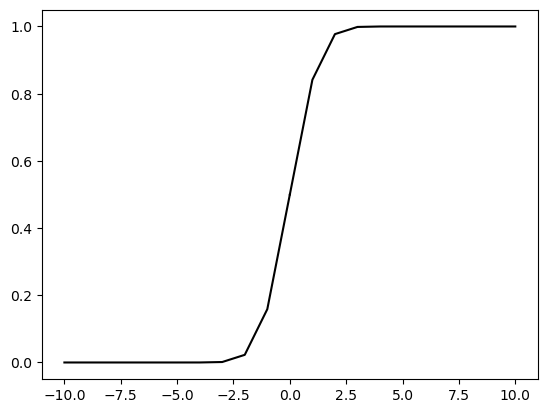

In [96]:
import numpy as np
import matplotlib.pyplot as plt

# Valores do parâmetro p_i
p_i = [0.231641900, 0.319381530, -0.356563782, 1.781477937, -1.821255978, 1.330274429]

# Função w 
def w (y):
    return 1 / (1 + (p_i[0] * abs(y)))

# Função z
def z (w):
    return (w * (p_i[1] + w * (p_i[2] + w * (p_i[3] + w * (p_i[4] + w * p_i[5])))))

# Aproximação analítica para a função de probabilidade acumulada
# Para y negativo
def phi_neg (z , y):
    return (z / np.sqrt( 2 * np.pi)) * np.exp(- (y**2 / 2))

# Para y positivo
def phi_pos (z , y):
    return 1 - (z / np.sqrt( 2 * np.pi)) * np.exp(- (y**2 / 2))

# Vetores para guardar os resultados 
phi_neg_results = []
phi_pos_results = []
y_neg = []
y_pos = []

# Verificação das funções
for y in range(-10 , 11, 1):
    if y < 0:
        w_calc = w(y)
        z_calc = z(w_calc)
        phi_neg_calc = phi_neg(z_calc, y)
        phi_neg_results.append(phi_neg_calc)
        y_neg.append(y)
    elif y == 0:
        w_calc = w(y)
        z_calc = z(w_calc)
        phi_neg_calc = phi_neg(z_calc, y)
        phi_neg_results.append(phi_neg_calc)
        y_neg.append(y)
        phi_pos_calc = phi_pos(z_calc, y)
        phi_pos_results.append(phi_pos_calc)
        y_pos.append(y)
    else:
        w_calc = w(y)
        z_calc = z(w_calc)
        phi_pos_calc = phi_pos(z_calc, y)
        phi_pos_results.append(phi_pos_calc)
        y_pos.append(y)

# Plotagem dos resultados
fig, ax = plt.subplots()
ax.plot(y_neg, phi_neg_results, color='black')
ax.plot(y_pos, phi_pos_results, color='black')
plt.show()

In [97]:
# Formulação da função inversa

# Valores do parâmetro p_i
p = [-0.3222324310880, -1.0000000000000, -0.3422422088547, -0.2042312102450e-1, -0.4536422101480e-4]

# Valores do parâmetro q_i
q = [0.9934846260600e-1, 0.5885815704950, 0.5311034623660, 0.10353775285000, 0.3856070063400e-2]

# Função inversa
# Para 0 < u <= 0.5
def y_1 (u):
    z = np.sqrt(np.log(1 / (u ** 2)))
    return -z - ((p[0] + z * (p[1] + z * (p[2] + z * (p[3] + z * (p[4]))))) / (q[0] + z * (q[1] + z * (q[2] + z * (q[3] + z * (q[4]))))))

# Para 0.5 <= u < 1
def y_2 (u):
    z = np.sqrt(np.log (1 / ((1 - u) ** 2)))
    return z + ((p[0] + z * (p[1] + z * (p[2] + z * (p[3] + z * (p[4]))))) / (q[0] + z * (q[1] + z * (q[2] + z * (q[3] + z * (q[4]))))))

[np.int64(0), np.int64(-1), np.int64(-2), np.int64(-3), np.int64(-4), np.int64(-5), np.int64(-6), np.int64(-7), np.int64(-8)]
[np.float64(8.160186326655605e-08), np.float64(-0.999999850223544), np.float64(-2.0000011964816147), np.float64(-2.999984266933476), np.float64(-3.999889395168855), np.float64(-4.9996951700643155), np.float64(-5.999419242585658), np.float64(-6.999097624841499), np.float64(-7.991573888288796)]


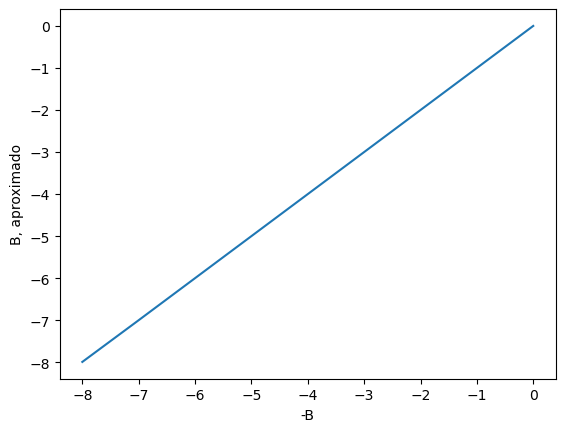

In [117]:
# Verificação da implementação

vetor_beta = [] 
vetor_beta_aprox = []

for i in np.arange (0, 9, 1):
    w_calc = w(i)
    z_calc = z(w_calc)
    vetor_beta.append(-1 * i)
    result = 1- phi_pos(z_calc, i)
    if result > 0:
        if result <= 0.5:
            inverse_result = y_1(result)
        else:
            inverse_result = y_2(result)
        vetor_beta_aprox.append(inverse_result)

print(vetor_beta)
print(vetor_beta_aprox)     
plt.plot(vetor_beta, vetor_beta_aprox)
plt.xlabel('-B')
plt.ylabel('B, aproximado')
plt.show()



# Tarefa 2

-- Teste Normal (Parametros -> Momentos) --
VA: VA normal (normal)
Parâmetros definidos (loc, scale): (50, 10)
Média calculada: 50.0 (Esperado: 50)
DP calculado: 10.0 (Esperado: 10)
Skewness: 0.0 (Esperado: 0.0)


Text(0, 0.5, '$x_{aproximado}$ (Calculado)')

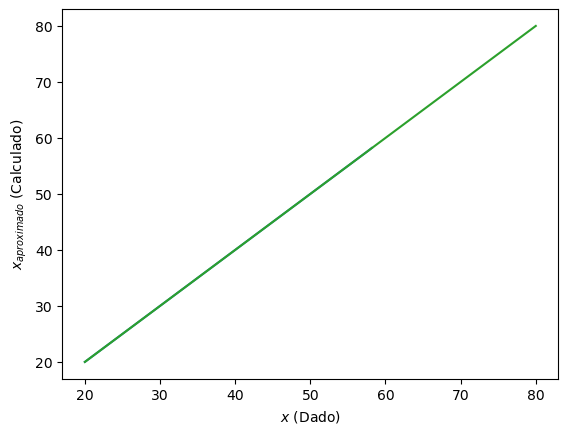

In [ ]:
import xml
from scipy import stats as st 
import numpy as np
import matplotlib.pyplot as plt

# Data members
class variavel_aleatoria:
    # Função para identificar qual é a distribuição, o nome da variável e o simbolo da distribuição
    def __init__(self, distribuicao: str, nome: str = "", simbolo: str =""):
        # Identificação
        self.nome = nome
        self.simbolo = simbolo
        self.distribuicao = distribuicao  

        # Lista de argumentos
        self.parametros = []
        self.objeto = None

        # Momentos da variável
        self.media = np.nan
        self.variancia = np.nan
        self.desvio = np.nan
        self.cv = np.nan
        self.skewness = np.nan
        self.kurtosis = np.nan

        # Distribuições contempladas
        self.distribuicoes = {
            'normal' : st.norm,
            'lognormal' : st.lognorm,
            'gumbel_max': st.gumbel_r,
            'gumbel_min': st.gumbel_l,
        }

        # Aqui as distribuições contemplatas são atribuidas ao componente objeto
        self.objeto = self.distribuicoes[self.distribuicao]

        # Aqui os parâmetros de cada distribuição são definidos e os momentos recalculados
    def conjunto_parametros (self, *params):
        self.parametros = params
        self.calculo_momentos()
    
        # Aqui os momentos são calculados a partir dos parametros
    def calculo_momentos(self):
        m, v, sk, k = self.objeto.stats(*self.parametros, moments = 'mvsk')

        # Armazenamento dos momentos nas variáveis
        self.media = float(m)
        self.variancia = float(v)
        self.desvio = np.sqrt(self.variancia)
        self.skewness = float(sk)
        self.kurtosis = float(k)

        if self.media != 0:
            self.cv = self.desvio / self.media
        else:
            self.cv = np.nan
    
    # Agora vamos calcular os parametros da variavel dado a media e o desvio padrão
    def calculo_parametros (self, media_dada: float, desvio_dado: float):
        mu = media_dada
        sigma = desvio_dado

        if self.distribuicao =='normal':
            self.conjunto_parametros(mu, sigma)
        
        elif self.distribuicao == 'lognormal':
            zeta = np.sqrt(np.log(1.0 + (sigma / mu) ** 2))
            lam = np.log(mu) - (0.5 * np.log(1.0 + (sigma / mu) ** 2))
            scale = np.exp(lam)
            self.conjunto_parametros(zeta, loc=0, scale=scale)

        elif self.distribuicao in ['gumbel_max', 'gumbel_min']:
            mu = media_dada
            sigma = desvio_dado
            gamma = 0.5772156649 #Constante de Euler-Mascheroni
            beta = (sigma * np.sqrt(6)) / np.pi

            if self.distribuicao == 'gumbel_max':
                mu_calc = mu - (beta * gamma)
            else:
                mu_calc = mu + (beta * gamma)
            self.conjunto_parametros(mu_calc, beta)
    
    # Agora vamos construir as funções fundamentais (PDF, CDF, Inversa)
    def PDF (self, x: float) -> float:
        if self.objeto:
            return self.objeto.pdf(x, self.parametros)
        return np.nan
    
    def CDF (self, x: float) -> float:
        if self.objeto:
            return self.objeto.cdf(x, self.parametros)
        return np.nan
    
    def InversaCDF (self, p: float) -> float:
        if self.objeto:
            return self.objeto.ppf(p, self.parametros)
        return np.nan
    
# Teste da estrutura
X_normal = variavel_aleatoria(distribuicao = 'normal', nome='VA normal', simbolo='X_N')
media_dada = 50
sigma_dado = 10

# Teste do conjunto de parametros e momentos para uma distribuição normal
print('-- Teste Normal (Parametros -> Momentos) --')
X_normal.conjunto_parametros(media_dada, sigma_dado)
print(f"VA: {X_normal.nome} ({X_normal.distribuicao})")
print(f"Parâmetros definidos (loc, scale): {X_normal.parametros}")
print(f"Média calculada: {X_normal.media} (Esperado: {media_dada})")
print(f"DP calculado: {X_normal.desvio} (Esperado: {sigma_dado})")
print(f"Skewness: {X_normal.skewness} (Esperado: 0.0)")

# Teste da inversa e CDF, utilizando 3 desvios padrão a partir da média no caso de distribuição normal
x_min = media_dada - (3 * sigma_dado)
x_max = media_dada + (3 * sigma_dado)
x_teste = np.linspace(x_min, x_max, 100)

x_aproximado = []
for x in x_teste:
    p = X_normal.CDF(x)
    x_calc = X_normal.InversaCDF(p)
    x_aproximado.append(x_calc)

plt.plot(x_teste, x_aproximado)
plt.show
plt.plot(x_teste, x_teste)
plt.xlabel('$x$ (Dado)')
plt.ylabel('$x_{aproximado}$ (Calculado)')

# Plotar a PDF